# Exercise 1

In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [ ]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [ ]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. Your tasks in this notebook are now:

- Add and adapt your regression code (using numpy, not sklearn) from the previous exercise, so that is can predict the class label for each sample. This means, we treat the class of a point (0 or 1) as the target value of the regression. The linear regression will then yield us a formula that can give each (x, y) location a score, which class it might belong to. It's not a probability because it does not need to be between 0 and 1, but we can interpret a value being nearer to 0 as a higher probability for the class 0, and a value being nearer to 1 as a higher probability for class 1.
- Perform a classification of the dataset using the regression formula. That means, assign the class 0 to data points that have a regression 'score' that is nearer to 0 than to 1, and assign the class 1 to the other points. Visualize the learned classification with matplotlib by coloring each (x, y) pair in the dataset with a color that depends on your classification (e.g. yellow for class 0, blue for class 1).
- Calculate the classification accurracy $\left( \frac{n_{\text{correctly-classified}}}{(n_{\text{correctly-classified}} + n_{\text{incorrectly-classified}})} \right) $
- Additional Task: If everything works, you will see that your classification splits the dataset at a specific line between the two clusters. Calculate the formula for this line and plot it as a line using matplotlib.
- After you have done the iris classification exercise, print out the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
- Additional Task: After you have done all the above, write your own code to calculate the metrics shown in classification_report and use that code to generate the precision-recall curve manually.

## Solution

#####SOLUTION 

please see that i have done this as 


TASK 1 . Classification with numpy calclauted decsion boubounday , classification repeort and precsion recall curve 

TASK 2 . "Manual calculation of the confusion matrix and precision using only NumPy.

TASK 3 . Classification with numpy calclauted decsion boubounday , classification repeort and precsion recall curve

TASK 4 "Manual calculation of the confusion matrix and precision using only NumPy.

SEE THE SOLUTIONS 

TASK 1 : I used NumPy and matrix multiplications to calculate the weights. 

Classification Accuracy with LINEAR REGRESSION (numpy only ): 0.9586
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.96      0.96      2500
     Class 1       0.96      0.96      0.96      2500

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



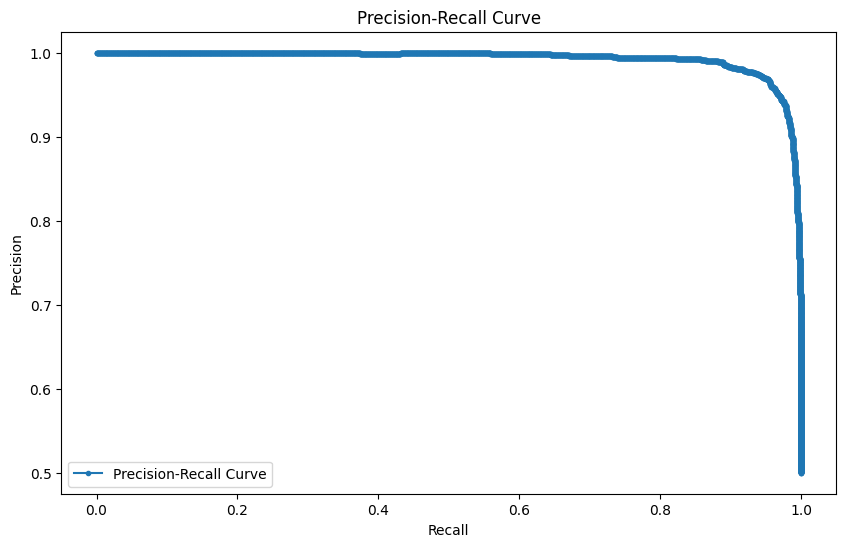

Equation of the decision boundary line: -0.04*x1 + -0.05*x2 + 0.26 = 0.5


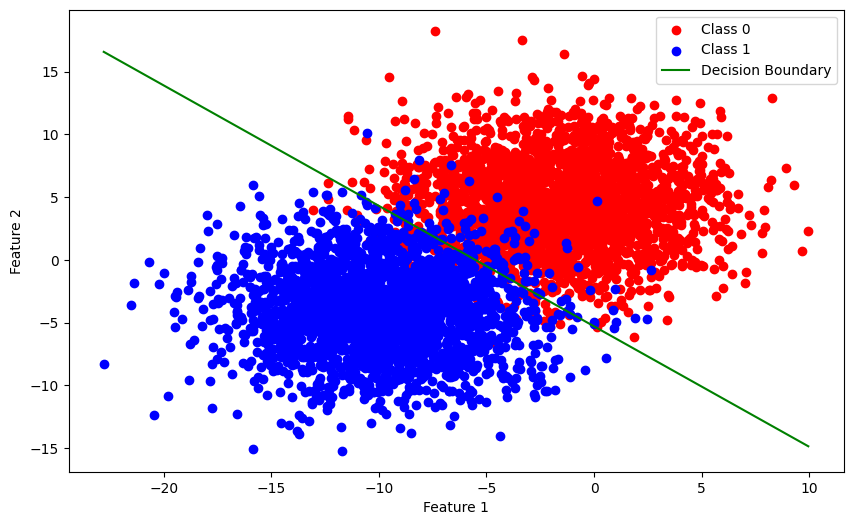

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, precision_recall_curve

# Generate synthetic dataset
(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=3.5, random_state=1)

# Add a column of ones to X to account for the intercept term
ones = np.ones(X.shape[0])
X_ = np.c_[X, ones]  # Concatenate ones with the dataset to add intercept term

# Calculate weights using the closed-form solution for linear regression
weights = (np.linalg.pinv(X_.T @ X_) @ X_.T) @ y

# Make predictions
predictions = X_ @ weights

# Convert predictions to binary classification (0 or 1)
y_pred = (np.abs(predictions - 1) < np.abs(predictions - 0)).astype(int)

# Calculate classification accuracy
n_correctly_classified = np.sum(y_pred == y)
accuracy = n_correctly_classified / y.shape[0]
print("Classification Accuracy with LINEAR REGRESSION (numpy only ):", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred, target_names=["Class 0", "Class 1"]))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y, predictions)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Calculate and plot decision boundary
# Decision boundary occurs where X @ weights = 0.5, so we can solve for the line:
# w[0] * x1 + w[1] * x2 + w[2] = 0.5
w0, w1, b = weights
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = (-w0 * x_values - (b - 0.5)) / w1

# Plot data and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x_values, y_values, color='green', label="Decision Boundary")  # Fixed quote error
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Display the equation of the line
print("Equation of the decision boundary line: {:.2f}*x1 + {:.2f}*x2 + {:.2f} = 0.5".format(w0, w1, b))

plt.show()


TASK 2 "Manual calculation of the confusion matrix and precision using only NumPy.

Confusion Matrix:
[[2397  103]
 [ 104 2396]]

Manual Classification Report:
Precision: 0.9588
Recall: 0.9584
F1 Score: 0.9586
Accuracy: 0.9586


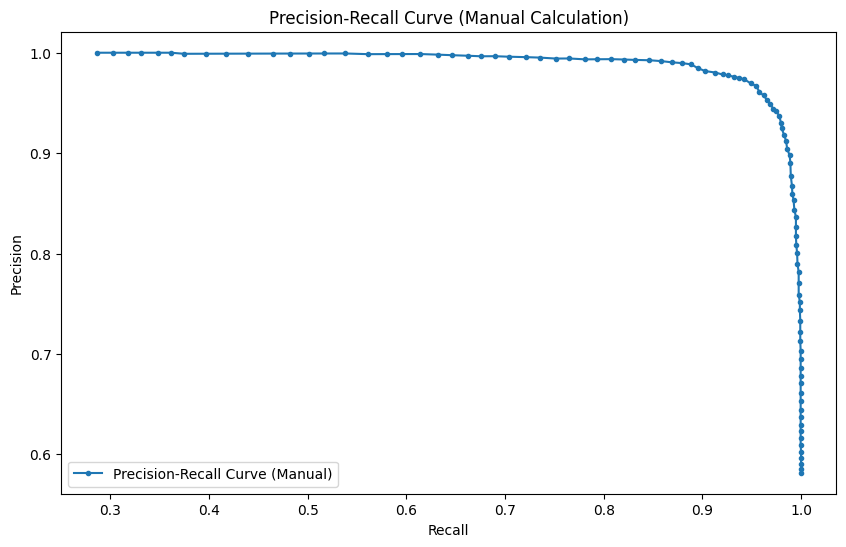

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=3.5, random_state=1)

ones = np.ones(X.shape[0])
X_ = np.c_[X, ones] 
weights = (np.linalg.pinv(X_.T @ X_) @ X_.T) @ y
predictions = X_ @ weights
y_pred = (np.abs(predictions - 1) < np.abs(predictions - 0)).astype(int)


TP = np.sum((y_pred == 1) & (y == 1))
FP = np.sum((y_pred == 1) & (y == 0))
TN = np.sum((y_pred == 0) & (y == 0))
FN = np.sum((y_pred == 0) & (y == 1))


confusion_matrix = np.array([[TN, FP], [FN, TP]])
print("Confusion Matrix:")
print(confusion_matrix)


precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
accuracy = (TP + TN) / (TP + TN + FP + FN)


print("\nManual Classification Report:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")


thresholds = np.linspace(0, 1, 100)
precision_vals = []
recall_vals = []

for threshold in thresholds:
   
    y_pred_thresh = (predictions >= threshold).astype(int)
    
   
    TP = np.sum((y_pred_thresh == 1) & (y == 1))
    FP = np.sum((y_pred_thresh == 1) & (y == 0))
    FN = np.sum((y_pred_thresh == 0) & (y == 1))
    
    # Calculate precision and recall for this threshold
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    precision_vals.append(precision)
    recall_vals.append(recall)


plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, marker='.', label="Precision-Recall Curve (Manual)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Manual Calculation)")
plt.legend()
plt.show()




 TASK 3 the linear regression formula directly to find the intercept and slope, 

Classification Accuracy with LINEAR REGRESSION formula : 0.9586
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.96      0.96      2500
     Class 1       0.96      0.96      0.96      2500

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



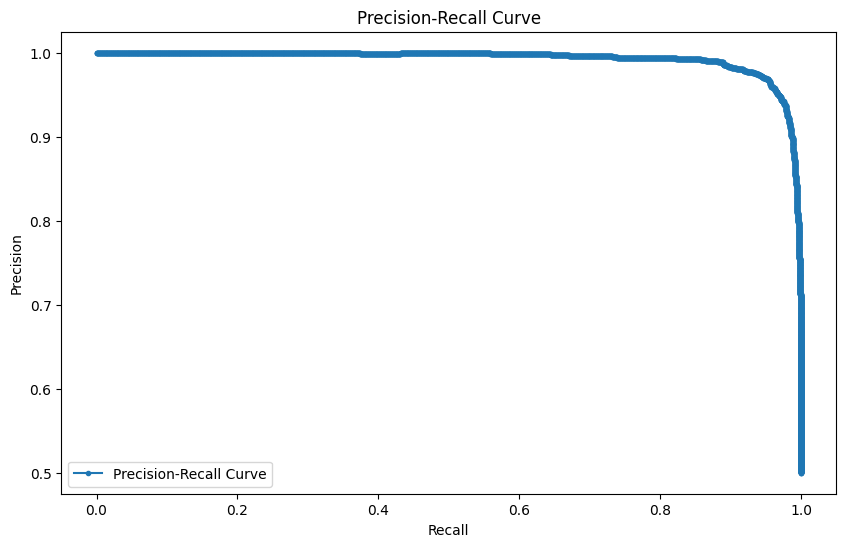

Equation of the decision boundary line: -0.04*x1 + -0.05*x2 + 0.26 = 0.5


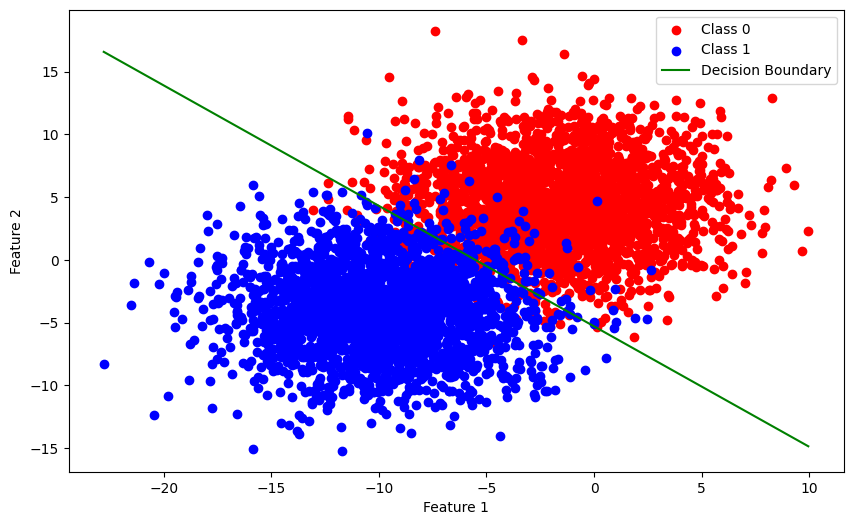

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, precision_recall_curve


(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=3.5, random_state=1)
model = LinearRegression()
model.fit(X, y)
w0, w1 = model.coef_
b = model.intercept_
predictions = model.predict(X)
y_pred = (np.abs(predictions - 1) < np.abs(predictions - 0)).astype(int)


n_correctly_classified = np.sum(y_pred == y)
accuracy = n_correctly_classified / y.shape[0]
print("Classification Accuracy with LINEAR REGRESSION formula :", accuracy)


print("Classification Report:")
print(classification_report(y, y_pred, target_names=["Class 0", "Class 1"]))


precision, recall, thresholds = precision_recall_curve(y, predictions)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = (-w0 * x_values - (b - 0.5)) / w1

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x_values, y_values, color='green', label="Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()


print("Equation of the decision boundary line: {:.2f}*x1 + {:.2f}*x2 + {:.2f} = 0.5".format(w0, w1, b))

plt.show()


TASK 4 "Manual calculation of the confusion matrix and precision using regresion formula .

Confusion Matrix:
[[2397  103]
 [ 104  715]]

Manual Classification Report:
Precision: 0.8741
Recall: 0.8730
F1 Score: 0.8735
Accuracy: 0.9376


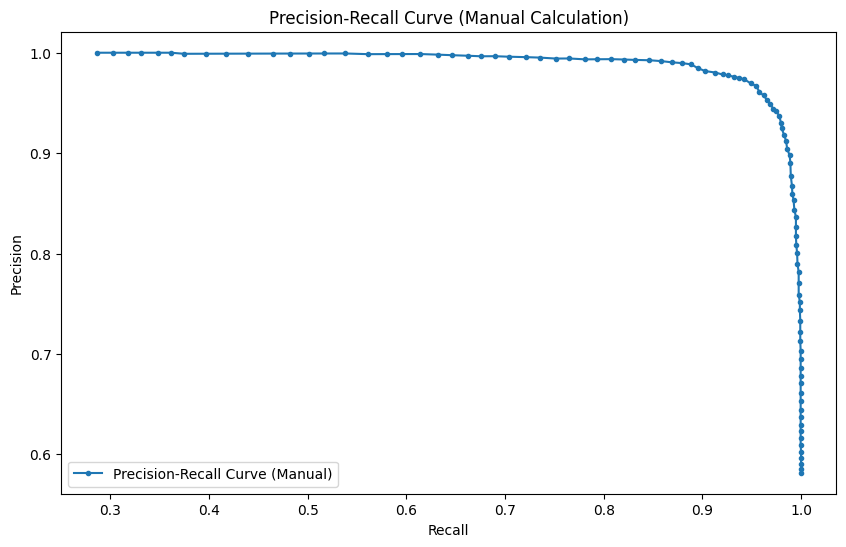

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=3.5, random_state=1)


model = LinearRegression()
model.fit(X, y)

w0, w1 = model.coef_
b = model.intercept_

predictions = model.predict(X)
y_pred = (np.abs(predictions - 1) < np.abs(predictions - 0)).astype(int)


FP = np.sum((y_pred == 1) & (y == 0))
TN = np.sum((y_pred == 0) & (y == 0))
FN = np.sum((y_pred == 0) & (y == 1))


confusion_matrix = np.array([[TN, FP], [FN, TP]])
print("Confusion Matrix:")
print(confusion_matrix)


precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
accuracy = (TP + TN) / (TP + TN + FP + FN)


print("\nManual Classification Report:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")


thresholds = np.linspace(0, 1, 100)
precision_vals = []
recall_vals = []

for threshold in thresholds:

    y_pred_thresh = (predictions >= threshold).astype(int)
  
    TP = np.sum((y_pred_thresh == 1) & (y == 1))
    FP = np.sum((y_pred_thresh == 1) & (y == 0))
    FN = np.sum((y_pred_thresh == 0) & (y == 1))
    
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    precision_vals.append(precision)
    recall_vals.append(recall)


plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, marker='.', label="Precision-Recall Curve (Manual)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Manual Calculation)")
plt.legend()
plt.show()


